In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from icglm.kernels.fun import KernelFunSum
from icglm.models.glm import GLM
from icglm.processes import OUProcess

%load_ext autoreload
%autoreload 2

30.17030170301703


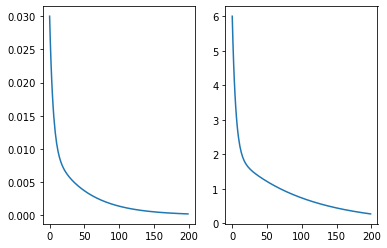

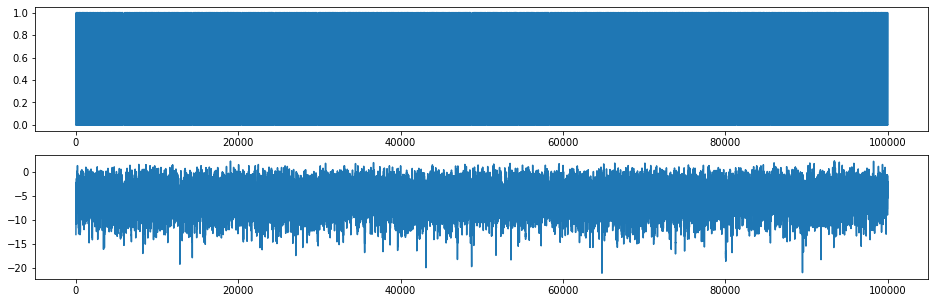

In [2]:
kappa_true = KernelFunSum(lambda t, tau: np.exp(-t / tau), 'tau', np.array([5, 50]), support=np.array([0, 50 * 7]), 
                     coefs=np.array([2, 1]) * 1e-2)
eta_true = KernelFunSum(lambda t, tau: np.exp(-t / tau), 'tau', np.array([5, 100]), support=np.array([0, 100 * 7]), 
                   coefs=np.array([4, 2]))
glm_true = GLM(u0=15, kappa=kappa_true, eta=eta_true)

dt = 1
t = np.arange(0, 100000, dt)
stim = OUProcess(mu=25, sd=25, tau=3).sample(t, seed=1)
v, r, mask_spk = glm_true.sample(t, stim)
print(np.sum(mask_spk) / t[-1] * 1000)

_t = np.arange(0, 200, dt)
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(_t, kappa_true.interpolate(_t))
ax2.plot(_t, eta_true.interpolate(_t))

fig, (ax1, ax2) = plt.subplots(figsize=(16, 5), nrows=2)
ax1.plot(t, mask_spk)
ax2.plot(t, v)

700
Starting gradient ascent... 

 Iteration 82 of 200 | Elapsed time: 0.76 seconds | log_prior=nan | log_posterior=-7981.44
 
 Iteration 82 of 200 | Converged | Elapsed time: 0.0126 minutes | Log posterior is monotonic 



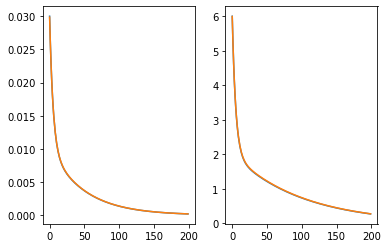

In [42]:
kappa = KernelFunSum(lambda t, tau: np.exp(-t / tau), 'tau', np.array([5, 50]), support=np.array([0, 50 * 7]), 
                     coefs=np.array([1, 1]) * 1e-2)
eta = KernelFunSum(lambda t, tau: np.exp(-t / tau), 'tau', np.array([5, 100]), support=np.array([0, 100 * 7]), 
                   coefs=np.array([1, 1]))
glm = GLM(u0=15, kappa=kappa, eta=eta, noise='bernoulli')

newton_kwargs = dict(max_iterations=200, stop_cond=1e-6)
optimizer = glm.fit(t, stim, mask_spk, newton_kwargs=newton_kwargs, verbose=True)

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(_t, kappa_true.interpolate(_t))
ax1.plot(_t, glm.kappa.interpolate(_t))
ax2.plot(_t, eta_true.interpolate(_t))
ax2.plot(_t, glm.eta.interpolate(_t))

Starting gradient ascent... 

 Iteration 82 of 200 | Elapsed time: 0.82 seconds | log_prior=nan | log_posterior=-7981.44
 
 Iteration 82 of 200 | Converged | Elapsed time: 0.0136 minutes | Log posterior is monotonic 

Starting gradient ascent... 

 Iteration 83 of 200 | Elapsed time: 0.62 seconds | log_prior=nan | log_posterior=-8618.97
 
 Iteration 83 of 200 | Converged | Elapsed time: 0.0104 minutes | Log posterior is monotonic 



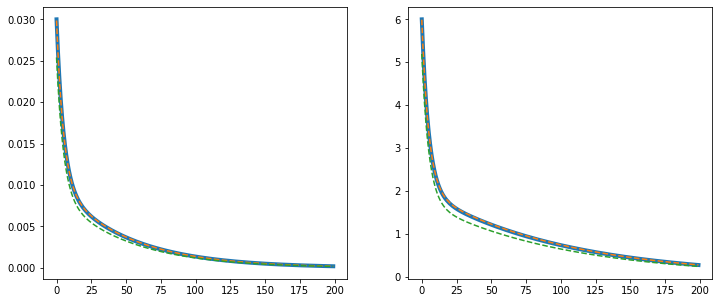

In [57]:
kappa = KernelFunSum(lambda t, tau: np.exp(-t / tau), 'tau', np.array([5, 50]), support=np.array([0, 50 * 7]), 
                     coefs=np.array([1, 1]) * 1e-2)
eta = KernelFunSum(lambda t, tau: np.exp(-t / tau), 'tau', np.array([5, 100]), support=np.array([0, 100 * 7]), 
                   coefs=np.array([1, 1]))
glm_bern = GLM(u0=15, kappa=kappa.copy(), eta=eta.copy(), noise='bernoulli')
glm_pois = GLM(u0=15, kappa=kappa.copy(), eta=eta.copy(), noise='poisson')

newton_kwargs = dict(max_iterations=200, stop_cond=1e-6)
optimizer_bern = glm_bern.fit(t, stim, mask_spk, newton_kwargs=newton_kwargs, verbose=True)
optimizer_pois = glm_pois.fit(t, stim, mask_spk, newton_kwargs=newton_kwargs, verbose=True)

fig, (ax1, ax2) = plt.subplots(figsize=(12, 5), ncols=2)
ax1.plot(_t, kappa_true.interpolate(_t), lw=4, label='true')
ax1.plot(_t, glm_bern.kappa.interpolate(_t), '--', label='bernoulli')
ax1.plot(_t, glm_pois.kappa.interpolate(_t), '--', label='poisson')
ax2.plot(_t, eta_true.interpolate(_t), lw=4)
ax2.plot(_t, glm_bern.eta.interpolate(_t), '--')
ax2.plot(_t, glm_pois.eta.interpolate(_t), '--')